# HW 7: Pretty Plot
Nurvirta Monarizqa (nm2773)

In [1]:
#set working environment packages
from zipfile import ZipFile
from StringIO import StringIO
import urllib2
import pandas as pd

In [12]:
# opening data into this notebook
# we use 4 months of data
filenames = ['201606','201607','201608','201609']
data = pd.DataFrame()
for filename in filenames:
    base = 'https://s3.amazonaws.com/tripdata/'
    r = urllib2.urlopen(base + filename +'-citibike-tripdata.zip').read()
    z = ZipFile(StringIO(r))
    citibikedata = z.open(filename+'-citibike-tripdata.csv')
    data = pd.concat([data,pd.read_csv(citibikedata)])
data.head(20)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1
5,946,6/1/2016 00:01:01,6/1/2016 00:16:48,503,E 20 St & Park Ave,40.738274,-73.987520,495,W 47 St & 10 Ave,40.762699,-73.993012,25193,Subscriber,1974.0,1
6,2351,6/1/2016 00:01:05,6/1/2016 00:40:16,533,Broadway & W 39 St,40.752996,-73.987216,386,Centre St & Worth St,40.714948,-74.002345,19538,Subscriber,1986.0,1
7,773,6/1/2016 00:01:24,6/1/2016 00:14:18,492,W 33 St & 7 Ave,40.750200,-73.990931,483,E 12 St & 3 Ave,40.732233,-73.988900,17101,Subscriber,1986.0,1
8,1929,6/1/2016 00:01:27,6/1/2016 00:33:37,525,W 34 St & 11 Ave,40.755942,-74.002116,306,Cliff St & Fulton St,40.708235,-74.005301,17802,Subscriber,1968.0,1
9,725,6/1/2016 00:01:38,6/1/2016 00:13:43,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,3083,Bushwick Ave & Powers St,40.712477,-73.941000,21421,Subscriber,1971.0,2


In [13]:
# add additional columns
data['hour'] = pd.to_datetime(data['starttime'], format='%m/%d/%Y %H:%M:%S').dt.hour
data['day'] = pd.to_datetime(data['starttime'], format='%m/%d/%Y %H:%M:%S').dt.dayofweek
data['date'] = pd.to_datetime(data['starttime'], format='%m/%d/%Y %H:%M:%S').dt.date
data['month'] = pd.to_datetime(data['starttime'], format='%m/%d/%Y %H:%M:%S').dt.month
data['age'] = 2016-data['birth year']

In [14]:
# add location column in latitude and longitude
data["start_location"] = "(" + data["start station latitude"].map(str) + "," + " " + data["start station longitude"].map(str) + ")"
data["stop_location"] = "(" + data["end station latitude"].map(str) + "," + " " + data["end station longitude"].map(str) + ")"
data.loc[:,"start_location"] = data.loc[:,"start_location"].map(eval)
data.loc[:,"stop_location"] = data.loc[:,"stop_location"].map(eval)

In [15]:
# summarize the data by hour and day
summ = data.groupby(['hour','day']).count()
summ = summ.tripduration.reset_index()
summ.head()

,hour,day,tripduration
0,0,0,5980
1,0,1,5514
2,0,2,6770
3,0,3,7925
4,0,4,9456


In [16]:
# create pivot data so that we can have cells for every single information
piv = summ.pivot_table(index='day',columns='hour',values='tripduration')
piv.index = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

Populating the interactive namespace from numpy and matplotlib


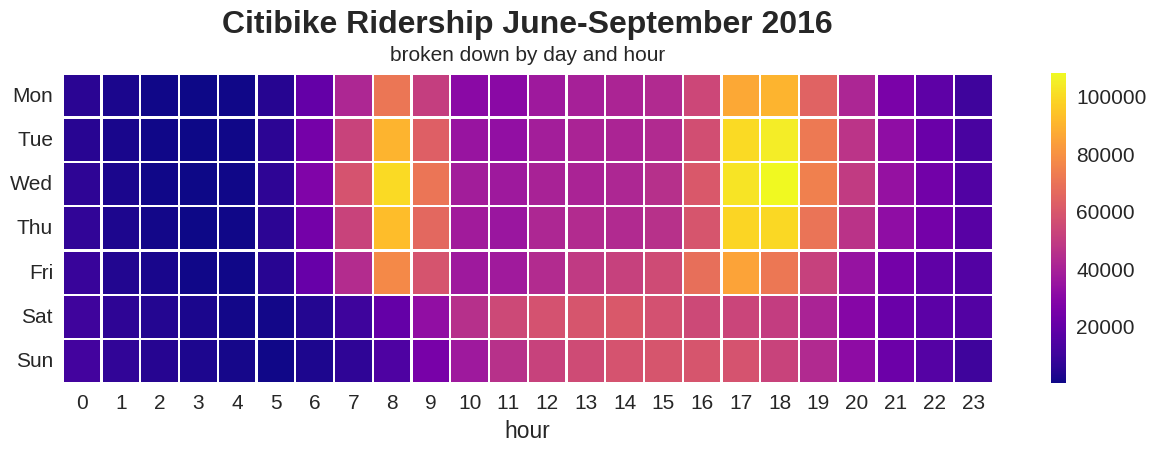

In [24]:
# plot the heatmap
import seaborn as sns
import matplotlib.pylab as pl
%pylab inline
sns.set_context("notebook", font_scale=1.5)
pl.figure(figsize=(15,4))
pl.suptitle('Citibike Ridership June-September 2016',fontsize=23,fontweight='bold',y=1.06,x=0.435)
pl.title('broken down by day and hour',fontsize=15,y=1.02)
#ax = sns.heatmap(piv,cmap=CBWcm['BuOr'],linewidths=1)
ax = sns.heatmap(piv,cmap='plasma',linewidths=1)
labels = ax.get_yticklabels()
pl.setp(labels, rotation=0)
pl.show()

In [81]:
# subset only June data
june = data[(data.month == 6)].copy()

In [82]:
# create distance column in June dataframe
import geopy
from geopy.distance import vincenty

def dist_(df):
    return vincenty(df["start_location"],df["stop_location"]).miles

june["distance"] = june.apply(dist_, axis=1)

In [178]:
# add speed data
june['speed'] = june.distance/(june.tripduration/3600)

In [92]:
# summarize data by date and gender
mf = june.groupby(['date','gender']).mean()
mf = mf.reset_index()
m = mf[(mf['gender']==1)].reset_index()
f = mf[(mf['gender']==2)].reset_index()

In [93]:
mf.head()

,date,gender,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,hour,day,age,month,distance,speed
0,2016-06-01,0,3151.826529,1067.114354,40.738159,-73.987811,1054.140957,40.738049,-73.987664,19561.138555,1973.441176,14.452245,2.0,42.558824,6.0,1.152593,3.408042
1,2016-06-01,1,850.487800,908.843370,40.738709,-73.987082,893.042766,40.738385,-73.987068,20111.973742,1976.771706,13.950797,2.0,39.228294,6.0,1.171380,5.842359
2,2016-06-01,2,930.898432,906.551238,40.735754,-73.987262,921.561881,40.735628,-73.987341,19844.150248,1978.276485,13.959818,2.0,37.723515,6.0,1.226341,5.261219
3,2016-06-02,0,2024.578362,1072.305966,40.737852,-73.987741,1066.018792,40.738138,-73.987792,19680.826309,1972.515152,14.593870,3.0,43.484848,6.0,1.163286,3.475585
4,2016-06-02,1,808.283964,918.572624,40.739189,-73.986810,898.911302,40.738786,-73.986967,20221.253894,1976.719935,13.907145,3.0,39.280065,6.0,1.158202,5.876981


In [86]:
# create initial dataframe to store only the necessary information
df = pd.DataFrame({'m_age':m.age,
                  'f_age':f.age})

In [90]:
# create another summarize to get the number of rides
mf2 = june.groupby(['date','gender']).count()
mf2 = mf2.tripduration.reset_index()
mf2.head()

,date,gender,tripduration
0,2016-06-01,0,5413
1,2016-06-01,1,37132
2,2016-06-01,2,12120
3,2016-06-02,0,5481
4,2016-06-02,1,37047


In [177]:
# completing dataframe
df['f_duration'] = f.tripduration
df['m_duration'] = m.tripduration
df['f_ridership'] = mf2[(mf2.gender==2)].reset_index().tripduration
df['m_ridership'] = mf2[(mf2.gender==1)].reset_index().tripduration
df['f_distance'] = f.distance
df['m_distance'] = m.distance
df['f_speed'] = f.speed
df['m_speed'] = m.speed
df.head()

,f_age,m_age,f_duration,m_duration,f_ridership,m_ridership,f_distance,m_distance,f_speed,m_speed
0,37.723515,39.228294,930.898432,850.487800,12120,37132,1.226341,1.171380,5.261219,5.842359
1,37.656869,39.280065,973.169881,808.283964,11873,37047,1.216067,1.158202,5.304930,5.876981
2,37.456967,38.913023,974.308786,752.870045,8297,27194,1.121172,1.079751,5.318495,5.886794
3,36.593292,37.673952,993.242383,870.442150,8796,21504,1.165506,1.089622,4.970862,5.471697
4,36.302049,37.258131,858.396918,905.237762,5127,13993,1.084045,1.001229,5.235278,5.625747


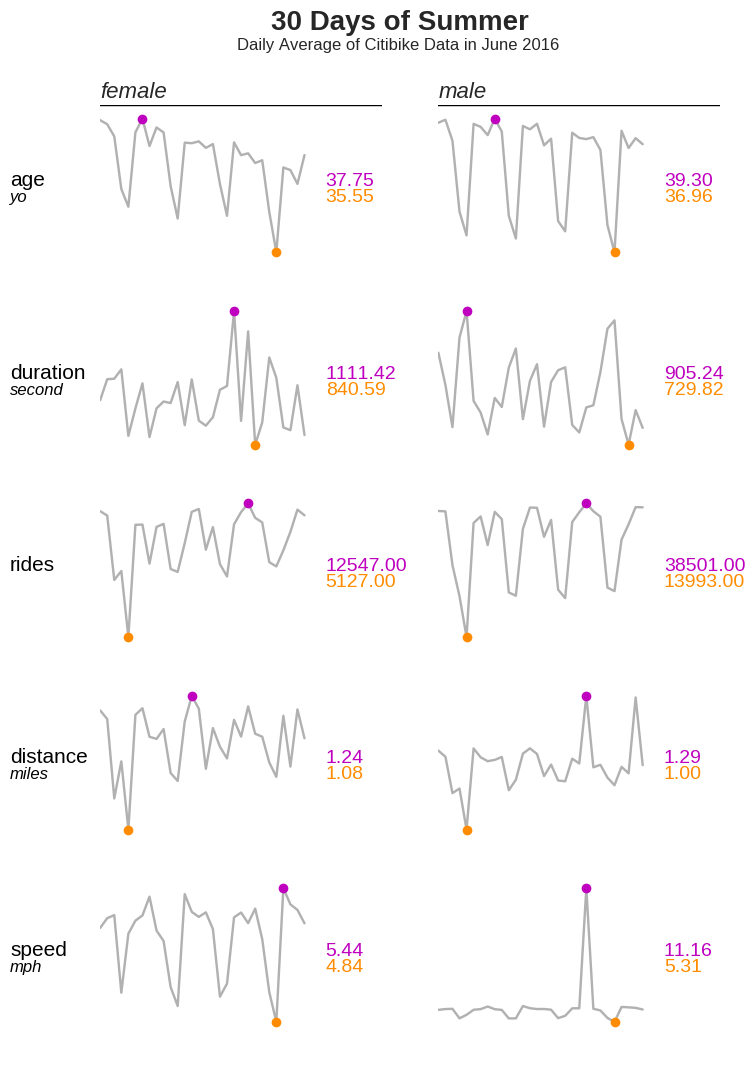

In [175]:
# plot as sparklines
labs = ['age','duration','rides','distance','speed']
s = ['yo','second','','miles','mph']
fig = plt.figure(figsize = (8,12));
pl.suptitle('30 Days of Summer',fontsize=20,fontweight='bold')

# credit for codes below: Dr Federica's https://github.com/fedhere/UInotebooks/blob/master/visz/sparklines.ipynb
ax=[]
pl.text(0.22,1.06,'Daily Average of Citibike Data in June 2016')
pl.axis('off')
for i in range(10):
    ax.append(fig.add_subplot(5,2,i+1))
    
    
    ax[i].plot(df.iloc[:,i], 'k', alpha=0.3)
    if i%2 != 1:
        ax[i].text(-0.32, 0.5, labs[i/2], color = 'k',fontsize=15, transform = ax[i].transAxes)
        ax[i].text(-0.32, 0.4, s[i/2], color = 'k',fontsize=12,style='italic',fontweight='light', transform = ax[i].transAxes)
    ax[i].axis('off')
    ax[i].plot(np.where(df.iloc[:,i]==max(df.iloc[:,i]))[0], max(df.iloc[:,i]),'o',c='m')
    ax[i].set_xlim(0,40)
    space = (max(df.iloc[:,i])-min(df.iloc[:,i]))/10
    ax[i].set_ylim(min(df.iloc[:,i])-space,max(df.iloc[:,i])+space)
    ax[i].plot(np.where(df.iloc[:,i]==min(df.iloc[:,i]))[0], min(df.iloc[:,i]),'o',c='darkorange')
    ax[i].text(0.8, 0.5, "%.2f"%(max(df.iloc[:,i])), color = 'm',
            fontsize=14, transform = ax[i].transAxes)
    ax[i].text(0.8, 0.4, "%.2f"%(min(df.iloc[:,i])), color = 'darkorange',
            fontsize=14, transform = ax[i].transAxes)
   
    if i<2:
        ax[i].plot((0,ax[i].get_xlim()[1]), (ax[i].get_ylim()[1], ax[i].get_ylim()[1]), 'k-',)

ax[0].text (0, 1.05, '{0:1s}'.format('female'), 
            transform = ax[0].transAxes, fontsize=16,style='italic')
ax[1].text (0, 1.05, '{0:1s}'.format('male'), 
            transform = ax[1].transAxes, fontsize=16,style='italic')
